# Homework 5
Emily Teng, Niaoniao Ma, Susannah Schulze, Xiaochen Guo

## Set up workspace

In [ ]:
# Mount to drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Change directory
% cd '/content/drive/Shared drives/423Group/Homework5/'

/content/drive/Shared drives/423Group/Homework5


## Question 2: CNN

### Question 1

In [ ]:
# Import packages
from tensorflow.python.client import device_lib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import losses, layers
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, AveragePooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [58]:
# Load data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [61]:
# Normalize pixel values to be from 0 to 1
train_images, test_images = train_images.astype('float32') / 255.0, test_images.astype('float32') / 255.0

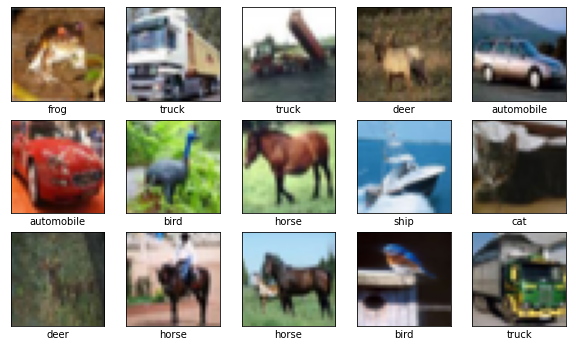

In [ ]:
# Visualize data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
# Understand data
print('Train: Images = %s, Labels = %s' %(train_images.shape, train_labels.shape))
print('Test: Images = %s, Labels = %s' % (test_images.shape, test_labels.shape))

Train: Images = (50000, 32, 32, 3), Labels = (50000, 1)
Test: Images = (10000, 32, 32, 3), Labels = (10000, 1)


In [ ]:
train_images.shape[0]

50000

### Question 2

In [ ]:
# Create the model
model = Sequential([
                    Conv2D(64,(11,11), padding = 'same', activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (32, 32, 3)), # 64 11x11 filters
                    MaxPooling2D(pool_size=(2,2),strides=2), # 2x2 max pooling with stride of 2
                    Conv2D(128,(3,3), padding='same', activation='relu', kernel_initializer = 'he_uniform'), # 128 3x3 filters
                    #MaxPooling2D(pool_size=(2,2),strides=2), # not sure if we need this extra max pooling layer
                    Conv2D(128,(3,3), padding='same', activation='relu', kernel_initializer = 'he_uniform' ),
                    AveragePooling2D(), 
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(10, activation = 'softmax') # 10 = number of image classes to return probability
])

In [ ]:
model.compile(optimizer='adam',
              loss = losses.SparseCategoricalCrossentropy(), 
              metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        23296     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
average_pooling2d (AveragePo (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

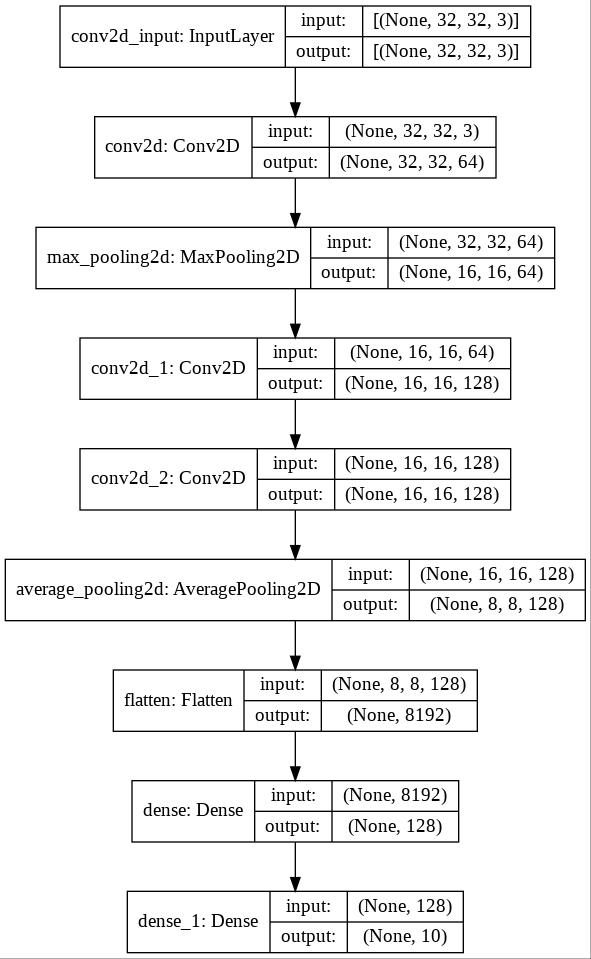

In [ ]:
plot_model(model, "model.jpg", show_shapes=True)

In [62]:
epochs = 15
batch_size = 256 # using a large batch size to speed up the time for training the model

history = model.fit(train_images, train_labels, 
                    epochs = epochs,
                    steps_per_epoch = train_images.shape[0] // batch_size,
                    validation_data=(test_images, test_labels),
                    validation_steps = test_images.shape[0] // batch_size)

Epoch 1/15
195/195 [==============================] - 4s 21ms/step - loss: 0.1924 - accuracy: 0.9336 - val_loss: 1.5160 - val_accuracy: 0.6610
Epoch 2/15
195/195 [==============================] - 4s 20ms/step - loss: 0.1749 - accuracy: 0.9381 - val_loss: 1.5598 - val_accuracy: 0.6658
Epoch 3/15
195/195 [==============================] - 4s 20ms/step - loss: 0.1375 - accuracy: 0.9529 - val_loss: 1.6984 - val_accuracy: 0.6628
Epoch 4/15
195/195 [==============================] - 4s 20ms/step - loss: 0.1168 - accuracy: 0.9596 - val_loss: 1.9430 - val_accuracy: 0.6673
Epoch 5/15
195/195 [==============================] - 4s 20ms/step - loss: 0.1057 - accuracy: 0.9637 - val_loss: 1.9215 - val_accuracy: 0.6717
Epoch 6/15
195/195 [==============================] - 4s 20ms/step - loss: 0.0913 - accuracy: 0.9687 - val_loss: 2.0571 - val_accuracy: 0.6661
Epoch 7/15
195/195 [==============================] - 4s 20ms/step - loss: 0.0774 - accuracy: 0.9738 - val_loss: 2.1304 - val_accuracy: 0.6675

In [63]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 2.6386 - accuracy: 0.6602


In [64]:
print("Test accuracy: ", test_accuracy)

Test accuracy:  0.6601999998092651


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs) 

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

### Question 3

In [ ]:
# Explore what the RGB of first layer looks like
from matplotlib import pyplot
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(layer.name, filters.shape)

conv2d (11, 11, 3, 64)
conv2d_1 (3, 3, 64, 128)
conv2d_2 (3, 3, 128, 128)


(11, 11, 3, 64)


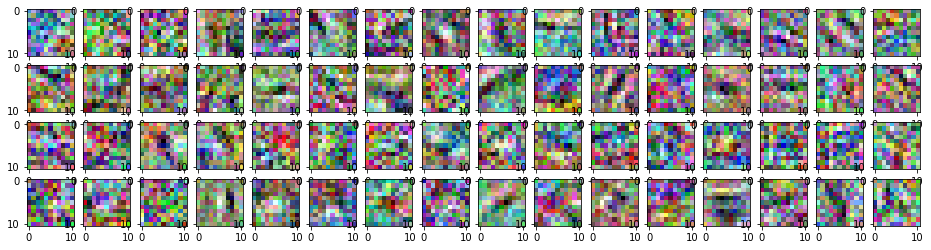

In [68]:
# Get the first layer
layer = model.get_layer('conv2d')
weights = layer.get_weights()[0]
weights = np.array(weights)
print(weights.shape)
plt.figure(figsize=(16,4))
for i in range(weights.shape[3]):
  kernel = weights[:,:,:,i]
  r = (kernel[:,:,0] - np.min(kernel[:,:,0])) / (np.max(kernel[:,:,0]) - np.min(kernel[:,:,0]))
  g = (kernel[:,:,1] - np.min(kernel[:,:,1])) / (np.max(kernel[:,:,1]) - np.min(kernel[:,:,1]))
  b = (kernel[:,:,2] - np.min(kernel[:,:,2])) / (np.max(kernel[:,:,2]) - np.min(kernel[:,:,2]))
  img = np.dstack([r,g,b])
  
  plt.subplot(4, 16, i+1)
  plt.imshow(img, cmap='gray')

### Question 4

In [ ]:
# Model 2: Batch Normalization Layers
model2 = Sequential([
                    Conv2D(64,(11,11), padding = 'same', activation = 'relu', kernel_initializer = 'he_uniform', input_shape = (32, 32, 3)), # 64 11x11 filters
                    BatchNormalization(),
                    MaxPooling2D(pool_size=(2,2),strides=2), # 2x2 max pooling with stride of 2
                    Conv2D(128,(3,3), padding='same', activation='relu', kernel_initializer = 'he_uniform'), # 128 3x3 filters
                    BatchNormalization(),
                    #MaxPooling2D(pool_size=(2,2),strides=2), # not sure if we need this extra max pooling layer
                    Conv2D(128,(3,3), padding='same', activation='relu', kernel_initializer = 'he_uniform' ),
                    BatchNormalization(),
                    AveragePooling2D(), 
                    Flatten(),
                    Dense(128, activation='relu'),
                    BatchNormalization(),
                    Dense(10, activation = 'softmax') # 10 = number of image classes to return probability
])

In [ ]:
model2.compile(optimizer='adam',
              loss = losses.SparseCategoricalCrossentropy(), 
              metrics = ['accuracy'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 64)        23296     
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 128)      

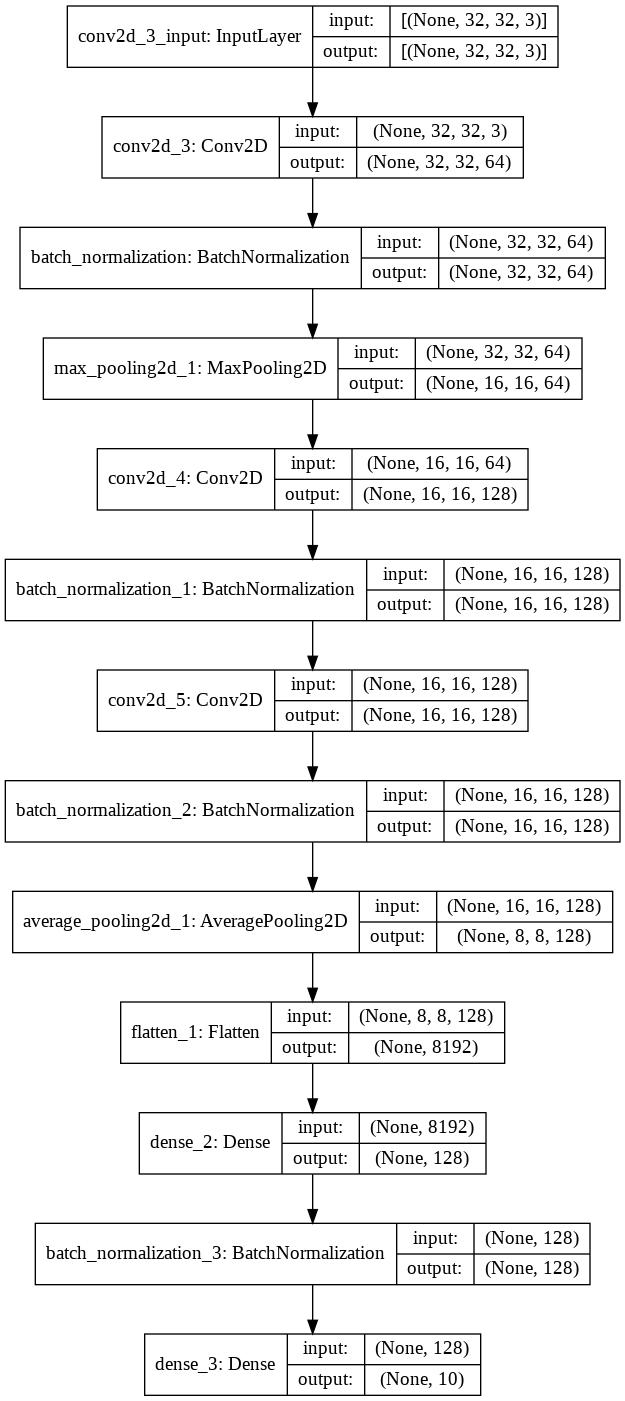

In [ ]:
plot_model(model2, "model2.jpg", show_shapes=True)

In [ ]:
epochs = 15
batch_size = 256 # using a large batch size to speed up the time for training the model

history2 = model2.fit(train_images, train_labels, 
                    epochs = epochs,
                    steps_per_epoch = train_images.shape[0] // batch_size,
                    validation_data=(test_images, test_labels),
                    validation_steps = test_images.shape[0] // batch_size)

Epoch 1/15
195/195 [==============================] - 6s 25ms/step - loss: 1.3406 - accuracy: 0.5313 - val_loss: 2.4375 - val_accuracy: 0.3111
Epoch 2/15
195/195 [==============================] - 5s 23ms/step - loss: 0.9424 - accuracy: 0.6697 - val_loss: 1.3588 - val_accuracy: 0.5328
Epoch 3/15
195/195 [==============================] - 5s 23ms/step - loss: 0.7571 - accuracy: 0.7355 - val_loss: 1.6825 - val_accuracy: 0.4894
Epoch 4/15
195/195 [==============================] - 4s 23ms/step - loss: 0.6045 - accuracy: 0.7911 - val_loss: 1.0313 - val_accuracy: 0.6402
Epoch 5/15
195/195 [==============================] - 5s 23ms/step - loss: 0.4642 - accuracy: 0.8431 - val_loss: 1.3332 - val_accuracy: 0.5845
Epoch 6/15
195/195 [==============================] - 5s 23ms/step - loss: 0.3416 - accuracy: 0.8885 - val_loss: 1.0323 - val_accuracy: 0.6714
Epoch 7/15
195/195 [==============================] - 5s 23ms/step - loss: 0.2213 - accuracy: 0.9314 - val_loss: 1.3887 - val_accuracy: 0.6462

In [ ]:
test_loss2, test_accuracy2 = model2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 1.3907 - accuracy: 0.6967


In [57]:
print("Test accuracy: ", test_accuracy2)
print("Test error:", 1-test_accuracy2)

Test accuracy:  0.6966999769210815
Test error: 0.30330002307891846


Text(0.5, 1.0, 'Training and Validation Loss')

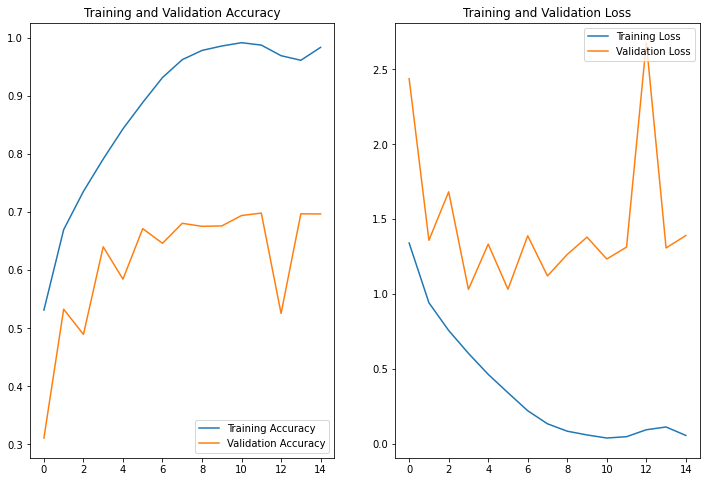

In [ ]:
acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs_range = range(epochs) 

plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc2, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc2, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss2, label = 'Training Loss')
plt.plot(epochs_range, val_loss2, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

Text(0.5, 1.0, 'Training Loss comparison')

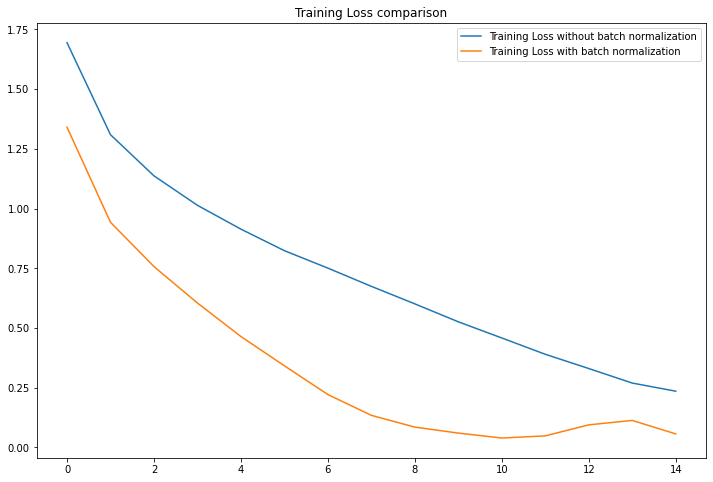

In [ ]:
#Compare the training loss with and without batch normalization as a function of epochs
plt.figure(figsize=(12,8))
plt.plot(epochs_range, loss, label = 'Training Loss without batch normalization')
plt.plot(epochs_range, loss2, label = 'Training Loss with batch normalization')
plt.legend(loc = 'upper right')
plt.title('Training Loss comparison')

(11, 11, 3, 64)


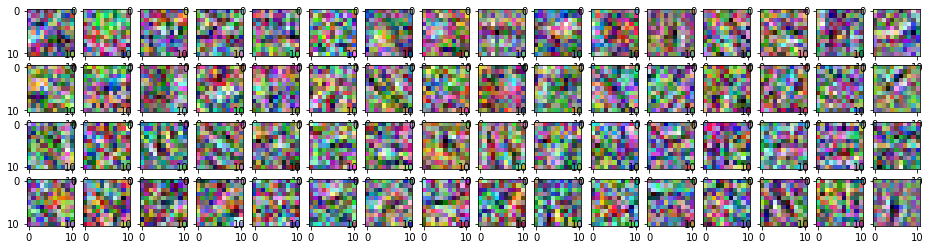

In [71]:
#Get the first layer
layer2 = model2.get_layer('conv2d_3')
weights2 = layer2.get_weights()[0]
weights2 = np.array(weights2)
print(weights2.shape)
plt.figure(figsize=(16,4))
for i in range(weights.shape[3]):
  kernel = weights2[:,:,:,i]
  r = (kernel[:,:,0] - np.min(kernel[:,:,0])) / (np.max(kernel[:,:,0]) - np.min(kernel[:,:,0]))
  g = (kernel[:,:,1] - np.min(kernel[:,:,1])) / (np.max(kernel[:,:,1]) - np.min(kernel[:,:,1]))
  b = (kernel[:,:,2] - np.min(kernel[:,:,2])) / (np.max(kernel[:,:,2]) - np.min(kernel[:,:,2]))
  img = np.dstack([r,g,b])
  
  plt.subplot(4, 16, i+1)
  plt.imshow(img, cmap='gray')

## Question 3: GAN

### 1. Vanilla Gan

In [ ]:
from __future__ import print_function, division

from keras.datasets import fashion_mnist
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

import matplotlib.pyplot as plt
import sys
import numpy as np

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
__________________________________________________

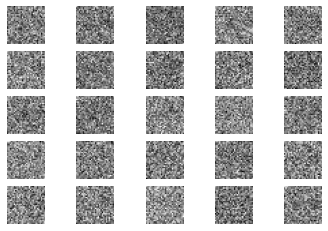

1 [D loss: 0.489811, acc.: 62.50%] [G loss: 0.626920]
2 [D loss: 0.401630, acc.: 70.31%] [G loss: 0.663445]
3 [D loss: 0.373803, acc.: 73.44%] [G loss: 0.749320]
4 [D loss: 0.350821, acc.: 78.12%] [G loss: 0.811683]
5 [D loss: 0.313460, acc.: 90.62%] [G loss: 0.910525]
6 [D loss: 0.280748, acc.: 93.75%] [G loss: 1.070110]
7 [D loss: 0.252008, acc.: 98.44%] [G loss: 1.163267]
8 [D loss: 0.213860, acc.: 100.00%] [G loss: 1.390418]
9 [D loss: 0.198161, acc.: 98.44%] [G loss: 1.572100]
10 [D loss: 0.169392, acc.: 100.00%] [G loss: 1.759776]
11 [D loss: 0.127777, acc.: 100.00%] [G loss: 1.835007]
12 [D loss: 0.109143, acc.: 100.00%] [G loss: 1.986869]
13 [D loss: 0.107474, acc.: 98.44%] [G loss: 2.069395]
14 [D loss: 0.084387, acc.: 100.00%] [G loss: 2.116873]
15 [D loss: 0.101159, acc.: 100.00%] [G loss: 2.213923]
16 [D loss: 0.072894, acc.: 100.00%] [G loss: 2.415823]
17 [D loss: 0.059836, acc.: 100.00%] [G loss: 2.532550]
18 [D loss: 0.059231, acc.: 100.00%] [G loss: 2.645648]
19 [D loss

KeyboardInterrupt: ignored

In [ ]:
# Build the GAN class
class GAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    # Building Generator model (G)
    def build_generator(self):

        model = Sequential()

        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    # Discriminator model (D)
    def build_discriminator(self):

        model = Sequential()

        model.add(Flatten(input_shape=self.img_shape))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)
    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load the dataset
        (X_train, _), (_, _) = fashion_mnist.load_data()

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            ######### Train the Discriminator #########

            # Select a random batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Generate a batch of new images
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            ######### Train the Generator #########

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        #fig.savefig("images/%d.png" % epoch)
        plt.show()
        plt.close()



if __name__ == '__main__':
    gan = GAN()
    gan.train(epochs=3000, batch_size=32, sample_interval=200)

In [ ]:
import pandas as pd
loss = pd.read_csv('Loss.csv')

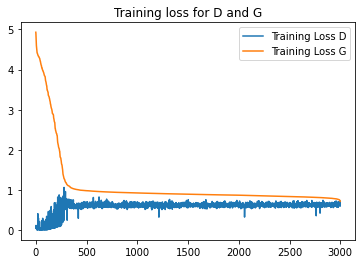

In [ ]:
epochs_range = range(3000)
plt.plot(epochs_range, loss['D'], label='Training Loss D')
plt.plot(epochs_range, loss['G'], label='Training Loss G')
plt.legend(loc='upper right')
plt.title('Training loss for D and G')
plt.show()

### Mode Collapse in GANs

In [ ]:
# Initial Attempt
# Build the GAN class
class GAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=optimizer)

    # Building Generator model (G)
    def build_generator(self):

        model = Sequential()

        model.add(Dense(256, input_dim=self.latent_dim))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))

        model.summary()

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    # Discriminator model (D)
    def build_discriminator(self):

        model = Sequential()

        model.add(Flatten(input_shape=self.img_shape))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))
        model.summary()

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128, sample_interval=50):

        # Load the dataset
        (X_train, _), (_, _) = fashion_mnist.load_data()

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            ######### Train the Discriminator #########

            # Select a random batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Generate a batch of new images
            gen_imgs = self.generator.predict(noise)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            ######### Train the unrolled Discriminator #########
            cur_update = update_dict
            for i in xrange(3):
                # Compute variable updates given the previous iteration's updated variable
                cur_update_dict = graph_replace(update_dict, cur_update_dict)
            # Final unrolled loss uses the parameters at the last time step
            unrolled_loss = graph_replace(los, cur_update_dict)


            ######### Train the Generator #########

            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))

            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

            # If at save interval => save generated image samples
            if epoch % sample_interval == 0:
                self.sample_images(epoch)

    def sample_images(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        #fig.savefig("images/%d.png" % epoch)
        plt.show()
        plt.close()



if __name__ == '__main__':
    gan = GAN()
    gan.train(epochs=3000, batch_size=32, sample_interval=200)

In [ ]:
import torch
from torch.utils.data import *
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import time
import torch.optim as optim
import numpy as np

import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid

BATCH_SIZE = 100

fmnist = torchvision.datasets.FashionMNIST(root="./", train=True,
transform = transforms.Compose([
        transforms.ToTensor()                                 
    ]), download=True)
data_loader = torch.utils.data.DataLoader(dataset=fmnist,
batch_size=BATCH_SIZE, shuffle=True)

for data in data_loader:
    img, label = data
    print(label)
    break

if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

import matplotlib.pyplot as plt


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.n_features = 128
        self.n_out = 28*28
        self.fc0 = nn.Sequential(
                    nn.Linear(self.n_features, 256),
                    nn.ReLU()
                    )
        self.fc1 = nn.Sequential(
                    nn.Linear(256, 512),
                    nn.ReLU()
                    )
        self.fc2 = nn.Sequential(
                    nn.Linear(512, 1024),
                    nn.ReLU()
                    )
        self.fc3 = nn.Sequential(
                    nn.Linear(1024, self.n_out),
                    nn.Tanh()
                    )
    def forward(self, x):
        x = self.fc0(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = x.view(-1, 1, 28, 28)
        return x

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_in = 28*28
        self.n_out = 1
        self.fc0 = nn.Sequential(
                    nn.Linear(self.n_in, 1024),
                    nn.ReLU()
                    )
        self.fc1 = nn.Sequential(
                    nn.Linear(1024, 512),
                    nn.ReLU()
                    )
        self.fc2 = nn.Sequential(
                    nn.Linear(512, 256),
                    nn.ReLU()
                    )
        self.fc3 = nn.Sequential(
                    nn.Linear(256, self.n_out),
                    nn.Sigmoid()
                    )
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc0(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

class VanillaGAN():
    def __init__(self, G, D, g_optim, d_optim, criterion):
        self.G = G
        self.D = D
        self.g_optim = g_optim
        self.d_optim = d_optim
        self.criterion = criterion
        self.images = []
        self.g_losses = []
        self.d_losses = []
        
    def train_G(self):
        """  
        Sample a batch of random noise
        Generate fake samples using the noise
        Feed fake samples to D and get prediction scores
        Optimize G to get the scores close to 1 (means real samples)
        """     
        self.g_optim.zero_grad()
        
        noises = Variable(torch.randn(self.batch_size, 128)).to(device)
        fake_samples = self.G(noises)

        pred = self.D(fake_samples)
        # as close as possible to 1
        loss = self.criterion(pred.squeeze(), Variable(torch.ones(self.batch_size)).to(device))
        loss.backward()
        self.g_optim.step()
        
        return loss
        
        
    def train_D(self, real_images):
        """
        Get a batch of real images
        Get a batch of fake samples from G
        Optimize D to correctly classify the two batches
        """
        self.d_optim.zero_grad()
        
        noises = Variable(torch.randn(self.batch_size, 128)).to(device)
        fake_samples = self.G(noises).detach()
        
        # real, close to 1
        real_pred = self.D(real_images)
        real_loss = self.criterion(real_pred.squeeze(), Variable(torch.ones(self.batch_size)).to(device))
        #real_loss.backward()
        
        # fake, close to 0
        fake_pred = self.D(fake_samples)
        fake_loss = self.criterion(fake_pred.squeeze(), Variable(torch.zeros(self.batch_size)).to(device))
        #fake_loss.backward()
                
        loss = real_loss + fake_loss
        loss.backward()
        self.d_optim.step()

        return loss
    
    def train(self, data_loader, num_epochs, batch_size):   
        self.batch_size = batch_size
        
        self.G.train()
        self.D.train()
        
        noise = Variable(torch.randn(self.batch_size, 128)).to(device)
        
        for epoch in range(num_epochs):
            start = time.time()
            print('\n' + 'Epoch {}/{}'.format(epoch+1, num_epochs))
            print('-' * 20)
            g_error = 0.0
            d_error = 0.0
            for i, data in enumerate(data_loader):
                img, label = data
                img = img.to(device)
                label = label.to(device)
                d_error += self.train_D(img)
                g_error += self.train_G()

            img = self.G(noise).cpu().detach()
            img = make_grid(img)
            self.images.append(img)
            self.g_losses.append(float(g_error)/i)
            self.d_losses.append(float(d_error)/i)
            print('g_loss: {:.3} | d_loss: {:.3}\r'.format(float(g_error)/i, float(d_error)/i))
            print('Time: {}'.format(time.time()-start))

myG = Generator()
myD = Discriminator()
# myG.cuda()
# myD.cuda()
criterion = nn.BCELoss()
g_optim = optim.Adam(myG.parameters(), lr=0.0001)
d_optim = optim.Adam(myD.parameters(), lr=0.0001)

myGAN = VanillaGAN(myG, myD, g_optim, d_optim, criterion)

myGAN.train(data_loader, 200, BATCH_SIZE)

In [ ]:
import torch
from torch.utils.data import *
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import time
import torch.optim as optim
import numpy as np

import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid

BATCH_SIZE = 100

fmnist = torchvision.datasets.FashionMNIST(root="./", train=True,
transform = transforms.Compose([
        transforms.ToTensor()                                 
    ]), download=True)
data_loader = torch.utils.data.DataLoader(dataset=fmnist,
batch_size=BATCH_SIZE, shuffle=True)

for data in data_loader:
    img, label = data
    print(label)
    break

if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")

import matplotlib.pyplot as plt


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.n_features = 128
        self.n_out = 28*28
        self.fc0 = nn.Sequential(
                    nn.Linear(self.n_features, 256),
                    nn.ReLU()
                    )
        self.fc1 = nn.Sequential(
                    nn.Linear(256, 512),
                    nn.ReLU()
                    )
        self.fc2 = nn.Sequential(
                    nn.Linear(512, 1024),
                    nn.ReLU()
                    )
        self.fc3 = nn.Sequential(
                    nn.Linear(1024, self.n_out),
                    nn.Tanh()
                    )
    def forward(self, x):
        x = self.fc0(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = x.view(-1, 1, 28, 28)
        return x

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_in = 28*28
        self.n_out = 1
        self.fc0 = nn.Sequential(
                    nn.Linear(self.n_in, 1024),
                    nn.ReLU()
                    )
        self.fc1 = nn.Sequential(
                    nn.Linear(1024, 512),
                    nn.ReLU()
                    )
        self.fc2 = nn.Sequential(
                    nn.Linear(512, 256),
                    nn.ReLU()
                    )
        self.fc3 = nn.Sequential(
                    nn.Linear(256, self.n_out),
                    nn.Sigmoid()
                    )
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc0(x)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

class VanillaGAN():
    def __init__(self, G, D, g_optim, d_optim, criterion):
        self.G = G
        self.D = D
        self.g_optim = g_optim
        self.d_optim = d_optim
        self.criterion = criterion
        self.images = []
        self.g_losses = []
        self.d_losses = []
        
    def train_G(self):
        """  
        Sample a batch of random noise
        Generate fake samples using the noise
        Feed fake samples to D and get prediction scores
        Optimize G to get the scores close to 1 (means real samples)
        """     
        self.g_optim.zero_grad()
        
        noises = Variable(torch.randn(self.batch_size, 128)).to(device)
        fake_samples = self.G(noises)

        pred = self.D(fake_samples)
        # as close as possible to 1
        loss = self.criterion(pred.squeeze(), Variable(torch.ones(self.batch_size)).to(device))
        loss.backward()
        self.g_optim.step()
        
        return loss
        
        
    def train_D(self, real_images):
        """
        Get a batch of real images
        Get a batch of fake samples from G
        Optimize D to correctly classify the two batches
        """
        self.d_optim.zero_grad()
        
        noises = Variable(torch.randn(self.batch_size, 128)).to(device)
        fake_samples = self.G(noises).detach()
        
        # real, close to 1
        real_pred = self.D(real_images)
        real_loss = self.criterion(real_pred.squeeze(), Variable(torch.ones(self.batch_size)).to(device))
        #real_loss.backward()
        
        # fake, close to 0
        fake_pred = self.D(fake_samples)
        fake_loss = self.criterion(fake_pred.squeeze(), Variable(torch.zeros(self.batch_size)).to(device))
        #fake_loss.backward()
                
        loss = real_loss + fake_loss
        loss.backward()
        self.d_optim.step()

        return loss
    
    def train(self, data_loader, num_epochs, batch_size):   
        self.batch_size = batch_size
        
        self.G.train()
        self.D.train()
        
        noise = Variable(torch.randn(self.batch_size, 128)).to(device)
        
        for epoch in range(num_epochs):
            start = time.time()
            print('\n' + 'Epoch {}/{}'.format(epoch+1, num_epochs))
            print('-' * 20)
            g_error = 0.0
            d_error = 0.0
            for i, data in enumerate(data_loader):
                img, label = data
                img = img.to(device)
                label = label.to(device)
                d_error += self.train_D(img)
                g_error += self.train_G()

            img = self.G(noise).cpu().detach()
            img = make_grid(img)
            self.images.append(img)
            self.g_losses.append(float(g_error)/i)
            self.d_losses.append(float(d_error)/i)
            print('g_loss: {:.3} | d_loss: {:.3}\r'.format(float(g_error)/i, float(d_error)/i))
            print('Time: {}'.format(time.time()-start))

In [ ]:
import copy
import torch
from torch.utils.data import *
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import time
import torch.optim as optim
import numpy as np

import torchvision
import torchvision.transforms as transforms
from torchvision.utils import make_grid

max_epoch = 50
binary = nn.BCELoss()
k = 5
D = Discriminator()
# D.cuda()
G = Generator()
# G.cuda()
g_loss = []
d_loss = []
d_optim = optim.RMSprop(D.parameters(), lr=0.0001)
g_optim = optim.RMSprop(G.parameters(), lr=0.0001)
for epoch in range(max_epoch):
    
    print('\n' + 'Epoch {}/{}'.format(epoch+1, max_epoch))
    print('-' * 20)
    start = time.time()
    g_error = 0.0
    d_error = 0.0
    for i, data in enumerate(data_loader):
        img, label = data
        # real
        img = img.to(device)
        label = label.to(device)
        # Train D
        d_optim.zero_grad()
        
        noises = Variable(torch.randn(100, 128)).to(device)
        fake_samples = G(noises).detach()
        
        # real, close to 1
        real_pred = D(img)
        real_loss = binary(real_pred.squeeze(), Variable(torch.ones(100)).to(device))
        
        # fake, close to 0
        fake_pred = D(fake_samples)
        fake_loss = binary(fake_pred.squeeze(), Variable(torch.zeros(100)).to(device))
                
        loss = real_loss + fake_loss
        loss.backward()
        d_error += loss
        d_optim.step()

        # make a copy of D into D unroll
        D_unroll = copy.deepcopy(D)
        d_unroll_optim = optim.RMSprop(D_unroll.parameters(), lr=0.0001)
        # D unroll for k steps
        for j, data_unroll in enumerate(data_loader):
            if j == k:
                break
            img_unroll, _ = data_unroll
            img_unroll = img_unroll.to(device)
            
            d_unroll_optim.zero_grad()
            noises = Variable(torch.randn(100, 128)).to(device)
            fake_samples = G(noises).detach()

            real_pred = D_unroll(img_unroll)
            real_loss = binary(real_pred.squeeze(), Variable(torch.ones(100)).to(device))

            fake_pred = D_unroll(fake_samples)
            fake_loss = binary(fake_pred.squeeze(), Variable(torch.zeros(100)).to(device))

            loss = real_loss + fake_loss
            loss.backward()
            d_unroll_optim.step() 

        # train G
        g_optim.zero_grad()
        
        noises = Variable(torch.randn(100, 128)).to(device)
        fake_samples = G(noises)

        pred = D_unroll(fake_samples)
        # as close as possible to 1
        loss = binary(pred.squeeze(), Variable(torch.ones(100)).to(device))
        loss.backward()
        g_error += loss
        g_optim.step()

    g_loss.append(float(g_error)/i)
    d_loss.append(float(g_error)/i)
    print('g_loss: {:.3} | d_loss: {:.3}\r'.format(float(g_error)/i, float(d_error)/i))
    print('Time: {}'.format(time.time()-start))

In [ ]:
import matplotlib.pyplot as plt

plt.hist(g_loss)

In [ ]:
plt.hist(d_loss)